In [2]:
import numpy as np

### 1. Bar Chart with Plotly
Plotly Express is the easy-to-use, high-level interface to Plotly, which operates on a variety of types of data and produces easy-to-style figures.

In [1]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

long_df = px.data.medals_long()

fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

### 2. Visualise MNIST Handwritten Digits Dataset (Seaborn)

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets


In [3]:
data = datasets.fetch_openml('mnist_784',
                            version = 1,
                            return_X_y = True, parser = 'auto')
pixel_values, targets = data
targets = targets.astype(int)

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

The formula for calculating __[Kullback-Leibler](https://machinelearningmastery.com/divergence-between-probability-distributions/)__ divergence:
<div>
<img src='./img/kl_diverg.jpg' width="500"/>
</div>


In [4]:
from sklearn import manifold
tsne = manifold.TSNE(n_components = 2, random_state = 42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

In [5]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

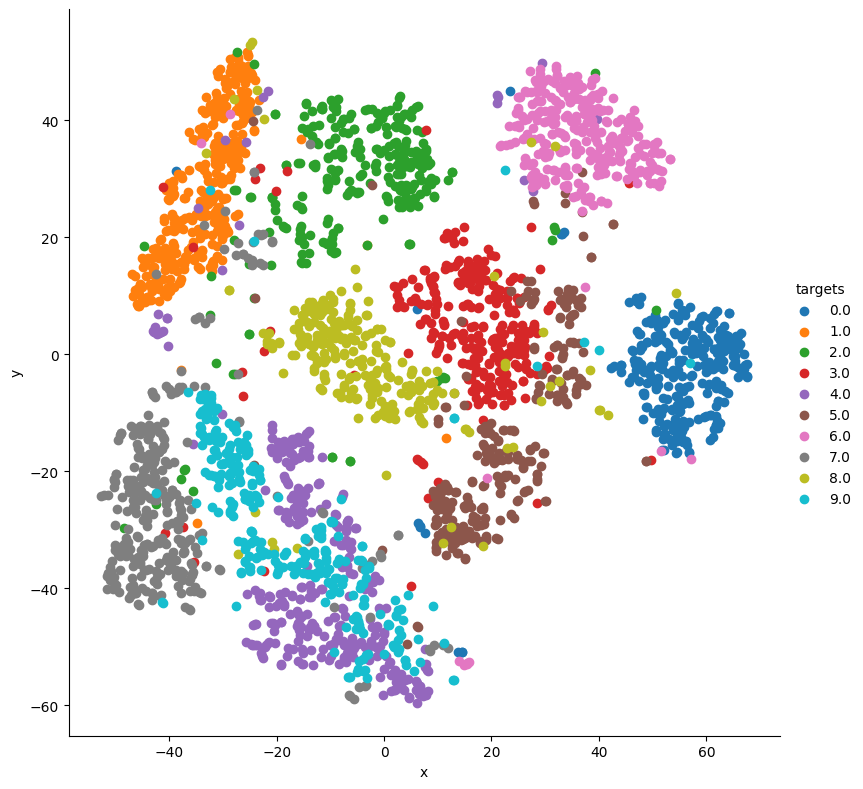

In [6]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

### 3. Drawing subplots with Matplotlib
> **eventplot()** method plots identical parallel lines at the given positions. This type of plot is commonly used in neuroscience for representing neural events, where it is usually called a spike raster, dot raster, or raster plot. However, it is useful in any situation where you wish to show the timing or position of multiple sets of discrete events, such as the arrival times of people to a business on each day of the month or the date of hurricanes each year of the last century.

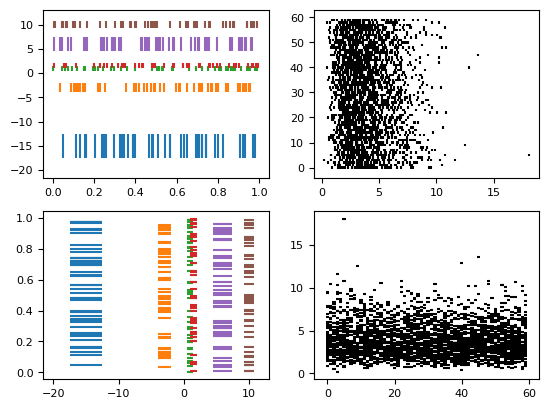

In [7]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 8.0

# Fixing random state for reproducibility
np.random.seed(19680801)


# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = [f'C{i}' for i in range(6)]

# set different line properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                    linelengths=linelengths1, orientation='vertical')

# create another set of random data.
# the gamma distribution is only used for aesthetic purposes
data2 = np.random.gamma(4, size=[60, 50])

# use individual values for the parameters this time
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2)


# create a vertical plot
axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                    linelengths=linelengths2, orientation='vertical')

plt.show()

### 4. Annotated Heatmap of Flights within years 1949 - 1960 (Seaborn)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset 
flights_long = sns.load_dataset("flights")

 In “long” data format, each year has multiple rows in the dataset.

| year | month | passengers|   
|------|------| ------|
|   1949 | Jan| 112|
|   1949 | Feb| 118|
|   1949 | Mar| 132|   
|   1960 | Aug| 606|
|   1960 | Sep| 508|

We are going to reshape data and group by year to draw heatmap.

| year | 1949 | 1960|   
|------|------| ------|
|  **month**  |  |     |
| Jan   |112 |  |
|Feb    |118 |  |
|  Mar  |132 |  |   
| Aug   | | 606|
| Sep   | | 508|

<Axes: xlabel='year', ylabel='month'>

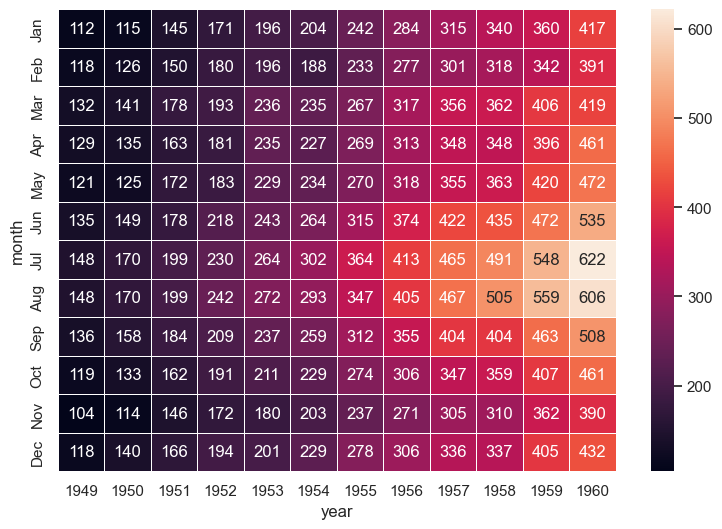

In [9]:
#Convert the dataset (aggregate, group years) to draw heatmap
flights = flights_long.pivot(index='month',columns='year', values='passengers')
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)